<a href="https://colab.research.google.com/github/lucasbrowser/python_algoritmo_kmeans/blob/master/KmeansIgti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias para a utilização do Kmeans

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#Exemplo do passo a passo com KMeans
Criação do conjunto de dados do dataset

<function matplotlib.pyplot.grid>

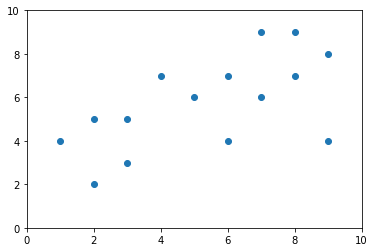

In [ ]:
dataset = np.array([[1,4],[2,2],[2,5],[3,3],[3,5],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

Utilizando a biblioteca Kmeans encontramos 3 clusters no conjunto de dados definido. O parâmetro init define a estratégia utilizada para a inicialização dos centróides. O valor **k-means++** é um algoritmo interno da biblioteca para uma definição mais assertiva dos centróides, utilizando nesse algoritmo também o parâmetro **n_init**.

<function matplotlib.pyplot.show>

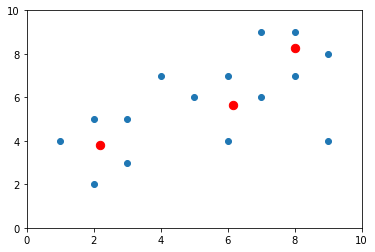

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'red')
plt.show

No exemplo abaixo  com a adição do parâmetro **c=pred_y** podemos identificar separadamente os clusters.

<function matplotlib.pyplot.show>

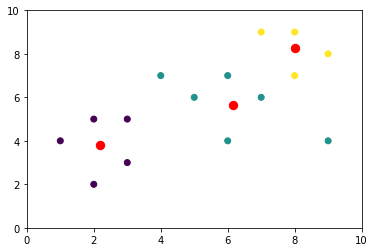

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=pred_y)
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'red')
plt.show

#Exemplo com dados aleatórios

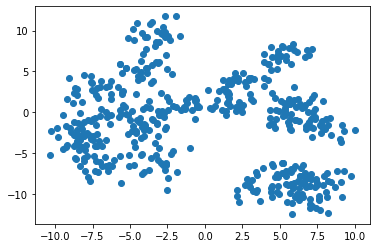

In [ ]:
x, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(x[:,0], x[:,1])


O gráfico de Elbow (gráfico de cotovelo) serve para determinar o número de clusters que poderá ser utilizada via segmentação com o Kmeans.

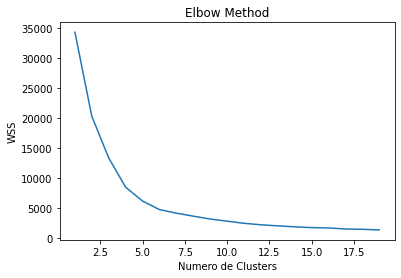

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Sendo assim, na curva do gráfico de Elbow, é interessante a utilização de 5 clusters.

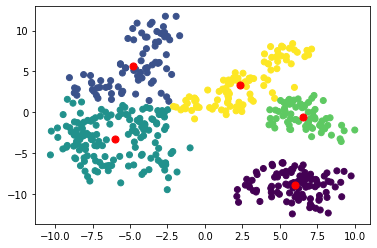

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.show()

O código abaixo verifica a posição do centroide

In [ ]:
kmeans.cluster_centers_

array([[-6.00093158, -3.22985389],
       [ 6.54167452, -0.57833569],
       [-4.77234911,  5.66811008],
       [ 6.01305095, -8.90895584],
       [ 2.37055809,  3.33784875]])

O código abaixo verifica  a soma dos quadrados intra-clusters (wcss) ao final da execução

In [ ]:
kmeans.inertia_

4717.404091931214

#Outras fontes de pesquisa para melhorar o código KMeans

Nos trechos abaixo estão a criação da função **calculate_wcss** que é responsável por fazer a soma dos quadrados e a função **optimal_number_of_clusters** responsável por definir uma melhor quantidade de clusters para a nossa análise.

In [ ]:
import math
 
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
 
    return wcss
 
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
 
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(x)
print(sum_of_squares)

[16949.214472147927, 9464.847250570496, 6005.101775346179, 4717.404091931214, 3662.6403286096665, 2977.6526991617593, 2503.53814306225, 2050.2071307551255, 1841.8381644426468, 1659.2257561968108, 1475.2763409696563, 1334.1034206567233, 1165.8711116227992, 1072.7100311703334, 978.000690111933, 915.8275017298608, 884.4856637110752, 793.2047882864035, 737.9933313718165]


In [ ]:
# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)
print(n)

6


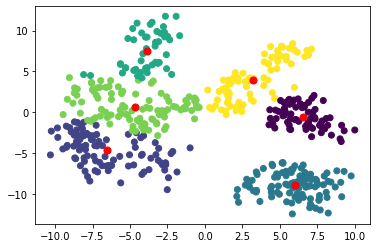

In [ ]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.show()